In [1]:
import numpy as np
import pandas as pd
from typing import List, Dict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spotify_millsongdata.csv")

In [3]:
df.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
df.shape

(57650, 4)

In [5]:
print(
    " The number of artists in this dataset is "
    + str(df["artist"].value_counts().unique().sum())
)

 The number of artists in this dataset is 17566


artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


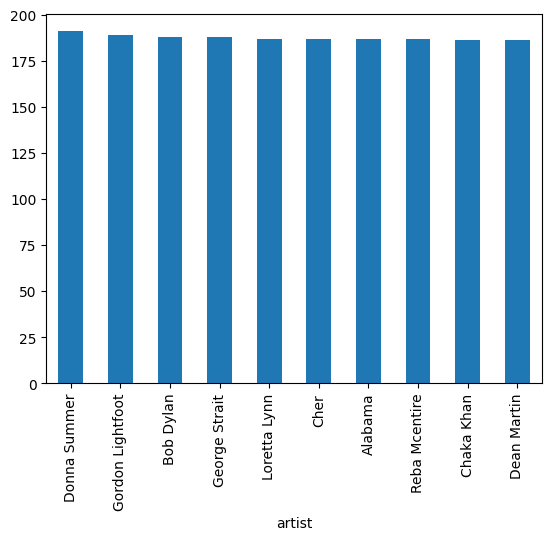

In [6]:
print(df["artist"].value_counts().head(10))
df["artist"].value_counts().head(10).plot(kind="bar")
plt.show()

In [7]:
# number of words in the lyrics
words = df["text"].apply(lambda x: len(str(x).split()))
words.describe()

count    57650.000000
mean       219.486262
std        108.814619
min         37.000000
25%        145.000000
50%        196.000000
75%        264.000000
max        827.000000
Name: text, dtype: float64

In [8]:
print(df[df["artist"] == "Justin Bieber"].shape)

(131, 4)


In [9]:
df = df.sample(n=20000, random_state=42).drop("link", axis=1).reset_index(drop=True)

In [10]:
df["text"] = df["text"].str.replace(r"\n", "")

In [11]:
df["text"] = df["text"].str.lower()

In [12]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()
df["text"] = df["text"].apply(
    lambda x: " ".join([porter.stem(word) for word in x.split()])
)

In [13]:
import nltk
from nltk.corpus import stopwords


nltk.download("stopwords")

stop = stopwords.words("english")

df["text"] = df["text"].apply(
    lambda x: " ".join([word for word in x.split() if word not in (stop)])
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df

,artist,song,text
0,Wishbone Ash,Right Or Wrong,"like 'round lie make thing dark peopl say, tas..."
1,Aerosmith,This Little Light Of Mine,"thi littl light mine (light mine), i'm let shi..."
2,Fall Out Boy,"Dance, Dance",say she' good word i'm wors bare stutter joke ...
3,Janis Joplin,Easy Rider,"hey mama, mama, come look sister, she' a-stand..."
4,Moody Blues,Peak Hour,"see window seems. never failing, like million ..."
...,...,...,...
19995,Dusty Springfield,Nothing Has Been Proved,mandy' paper 'caus tri go spain she'll soon do...
19996,Radiohead,Full Stop,[intro] realli mess everyth realli mess everyt...
19997,Elton John,Elderberry Wine,there' fli window dog yard year sinc saw there...
19998,Young Jeezy,Over Here,"get money here, pimpin' see ya boy look y'all ..."


In [15]:
tfidf = TfidfVectorizer(analyzer="word")

In [16]:
lyrics_matrix = tfidf.fit_transform(df["text"])

In [17]:
lyrics_matrix

<20000x42775 sparse matrix of type '<class 'numpy.float64'>'
	with 1286269 stored elements in Compressed Sparse Row format>

In [18]:
cosine_similarities = cosine_similarity(lyrics_matrix)

In [19]:
similarities = {}

for i in range(len(cosine_similarities)):

    similar_indices = cosine_similarities[i].argsort()[:-10:-1]

    similarities[df["song"].iloc[i]] = [
        (cosine_similarities[i][x], df["song"][x], df["artist"][x])
        for x in similar_indices
    ][1:]

In [20]:
df_similarities = pd.DataFrame(similarities)
df_similarities.head()

,Right Or Wrong,This Little Light Of Mine,"Dance, Dance",Easy Rider,Peak Hour,Crazier,Temptation,Kiss Me At Midnight,Little Black Sandals,I Keep Dreaming Of You All The Time,...,Just Can't Stay Away,Carousel,Nicole,"Stop, Look And Listen",Are You Washed In The Blood?,It's Goin' Down,Nothing Has Been Proved,Full Stop,Elderberry Wine,Loneliest Girl In The Crowd
0,"(0.6926151152718886, Wrong, Depeche Mode)","(0.8912552753241874, This Little Light Of Mine...","(0.575518266675977, Transmission, New Order)","(0.5910962209810225, Easy Rider, Janis Joplin)","(0.32206992542535673, Other Hours, Harry Conni...","(0.7754941711502459, Crazier, Gary Numan)","(0.3929678420157294, Give Up, Diana Ross)","(0.5066471621902396, Kiss Me, Annie)","(0.24616790905806982, Killer Of Giants, Ozzy O...","(0.45593219644788874, Dream The Night Away, Ch...",...,"(0.45150868115330983, Stay Away, Toto)","(0.5349716820407145, Far Away From Home, Alan ...","(0.7885648165579645, Bitter Creek, Eagles)","(0.3948308663184134, Friday's Child, Van Morri...","(0.4617949610595998, Washed In The Blood, Indi...","(0.2808057278246893, Do It To Ya, YG)","(0.24445918290753302, Gotta Serve Somebody, Bo...","(0.3566836991654504, The Truth About Love, P!nk)","(0.21470543444743873, When You Were Mine, John...","(0.34757555587642536, Earth Is The Loneliest P..."
1,"(0.4890892450398529, High Sierra, Linda Ronstadt)","(0.7417467408562523, Light From Your Lighthous...","(0.5276700652016277, I'm Not Gonna Teach Your ...","(0.39963978746206613, C.C. Rider, Elvis Presley)","(0.3022579770522006, Midnight Hour, Grateful D...","(0.24939899384300776, Forget About It, Alison ...","(0.35537008896273625, The Moment You Left Me, ...","(0.46320932080544946, Midnight, King Diamond)","(0.1966807491871396, Intro, J Cole)","(0.42959301156984964, Dream Love, Yoko Ono)",...,"(0.42222010389632725, Can't Stay Away From You...","(0.4246026490887795, Oh Love, Green Day)","(0.7866235258034726, Jesus Is Just Alright, Do...","(0.36377883007589196, Don't You Know, Van Morr...","(0.40613975933229735, Nothing But The Blood, M...","(0.26968652640680785, Where The Haters At?, Yo...","(0.24010526650842537, Nothing To Show, Supertr...","(0.323007652354002, The Truth Whole Truth, Nut...","(0.18641400459463928, Kiss Me, Robbie Williams)","(0.3423052885445563, She's A Girl And I'm A Ma..."
2,"(0.4644304995795569, Wrong All Along, Cheap Tr...","(0.6526391050555186, I Shine, You Shine, Fabol...","(0.5213951715844843, Dance, Dance, Dance, Neil...","(0.390772036840608, Cool Rider, Grease)","(0.277948550708475, A Million Days, Prince)","(0.11161403392489458, Spin, Spin, Spin, Jim Cr...","(0.34926952548926626, When There's Nothing Lef...","(0.438296006655614, Midnight Blue, Vanessa Wil...","(0.1893457625475976, Black Star, Elvis Presley)","(0.42781989084244487, In My Dreams, Judds)",...,"(0.3851674407480178, I Can't Breakaway, Natali...","(0.3921203636435262, Spread Your Wings, Queen)","(0.7690109501732609, The Coffee Song, Deep Pur...","(0.35164503229246313, Wave Ya Hand, Nicki Minaj)","(0.40099033458636374, There Is Power In The Bl...","(0.2676698438198438, Do Ya Bad, Yung Joc)","(0.23973047153444124, Forever Young, Meat Loaf)","(0.2660166141692746, Over The Top, Scorpions)","(0.16578228813658913, Fall In Love With Me, Ig...","(0.3283725748681672, She's Got The Answer, Air..."
3,"(0.3931530633091998, Where Did We Go Wrong, Le...","(0.5676400294430649, Wait For The Light To Shi...","(0.5132903464956025, Can't Stop The Feeling!, ...","(0.3860253050509746, It's So Easy, Linda Ronst...","(0.24885164528806747, Closer By The Hour, Doll...","(0.10360037230577858, Lift Me Up, Olivia Newto...","(0.34292864704903886, Don't Give Up, Peter Gab...","(0.40809367294610566, At Midnight (My Love Wil...","(0.18720432359472655, What Are You Waiting For...","(0.41395119740282754, Dream Of Me, Backstreet ...",...,"(0.38330781140667486, Stay Away, Nirvana)","(0.3847385939036815, Far Away, Scorpions)","(0.7625685521400855, Wear Out The Turnpi

In [21]:
class ContentBasedRecommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        number_of_items = len(recom_song)

        print(f'You are playing a song "{song}"')
        print(f"{number_of_items} Other recommendations that you might like:")
        for i in range(number_of_items):
            print(f"No.{i+1}:")
            print(
                f'"{recom_song[i][1]}" by "{recom_song[i][2]}" => with {round(recom_song[i][0], 3)} similarity score'
            )
            print("--------------------")

    def recommend(self, target_song):
        song = target_song
        recom_song = self.matrix_similar[song][:5]
        self._print_message(song=song, recom_song=recom_song)

In [22]:
recommedations = ContentBasedRecommender(similarities)

In [23]:
recommedations

In [24]:
df[df["artist"] == "Def Leppard"]

,artist,song,text
192,Def Leppard,Day After Day,"know me, look eye shed skin, got new disguis h..."
509,Def Leppard,Travelling Band,(creedenc clearwat revival) 737 come sky oh ta...
653,Def Leppard,Bad Actress,twenty-on year answer call hollywood scream be...
1109,Def Leppard,Hanging On The Telephone,"i'm phone booth, it' one across hall answer, i..."
1189,Def Leppard,All I Want Is Everything,know leav know stay i'v got thing must tell kn...
1261,Def Leppard,Desert Song,dark dirti like never seen mind twist thought ...
1390,Def Leppard,White Lightning,"promises, guarante come you'r alreadi knee wan..."
1429,Def Leppard,Satellite,"midnight, bright light, shine sky circul round..."
1571,Def Leppard,Stagefright,said welcom show it' a-you babi got whole damn...
1892,Def Leppard,Glad I'm Alive,hello welcom friend it' good see know anyth ne...


In [25]:
recommedations.recommend("All I Want For Christmas Is You")

You are playing a song "All I Want For Christmas Is You"
5 Other recommendations that you might like:
No.1:
"All I Want For Christmas Is You" by "Demi Lovato" => with 0.666 similarity score
--------------------
No.2:
"All I Want For Christmas Is You" by "Justin Bieber" => with 0.624 similarity score
--------------------
No.3:
"Christmas Without You" by "Dolly Parton" => with 0.431 similarity score
--------------------
No.4:
"Please Come Home For Christmas" by "Harry Connick, Jr." => with 0.416 similarity score
--------------------
No.5:
"Christmas Needs Love To Be Christmas" by "Andy Williams" => with 0.415 similarity score
--------------------


In [26]:
import pickle

pickle.dump(similarities, open("similarity.pkl", "wb"))
pickle.dump(df, open("df.pkl", "wb"))